# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [29]:
import math
import sys

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model
import seaborn as sns

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [31]:
# YOUR CODE HERE
df = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_red/wine_quality_red.tsv.gz", sep="\t")
df_random_sample = df.sample(n=10)
df_random_sample

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
168,6.8,0.63,0.07,2.1,0.089,11.0,44.0,0.99530,3.47,0.55,10.4,6
1111,5.4,0.42,0.27,2.0,0.092,23.0,55.0,0.99471,3.78,0.64,12.3,7
882,8.4,0.31,0.29,3.1,0.194,14.0,26.0,0.99536,3.22,0.78,12.0,6
1371,7.5,0.58,0.56,3.1,0.153,5.0,14.0,0.99476,3.21,1.03,11.6,6
1449,7.2,0.38,0.31,2.0,0.056,15.0,29.0,0.99472,3.23,0.76,11.3,8
997,5.6,0.66,0.00,2.2,0.087,3.0,11.0,0.99378,3.71,0.63,12.8,7
1129,10.5,0.43,0.35,3.3,0.092,24.0,70.0,0.99798,3.21,0.69,10.5,6
1037,7.3,0.91,0.10,1.8,0.074,20.0,56.0,0.99672,3.35,0.56,9.2,5
20,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4,6
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [32]:
# YOUR CODE HERE
df.columns[:10]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

YOUR ANSWERS HERE

**'fixed acidity'-** Amount of main acids that contribute to the wine’s basic sourness.<br>
**'volatile acidity'-** Type of acidity that can give the wine a sharper or vinegar-like smell if too high.<br>
**'citric acid'-** A small natural acid that adds a bit of freshness to the flavor.<br>
**'residual sugar'-** Sugar left after fermentation that affects how sweet the wine tastes.<br>
**'chlorides'-** General salt content of the wine.<br>
**'free sulfur dioxide'-** Preservative that helps protect the wine from spoiling.<br>
**'total sulfur dioxide'-** Overall level of sulfur-based preservatives in the wine.<br>
**'density'-** How heavy the wine is compared to water<br>
**'pH'-** Measure of how acidic the wine is.<br>
**'sulphates'-** Additives that help keep the wine stable and fresh.<br>

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

### Section 1 - Exploratory Data Analysis

In [33]:
# YOUR CODE HERE
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  target                1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


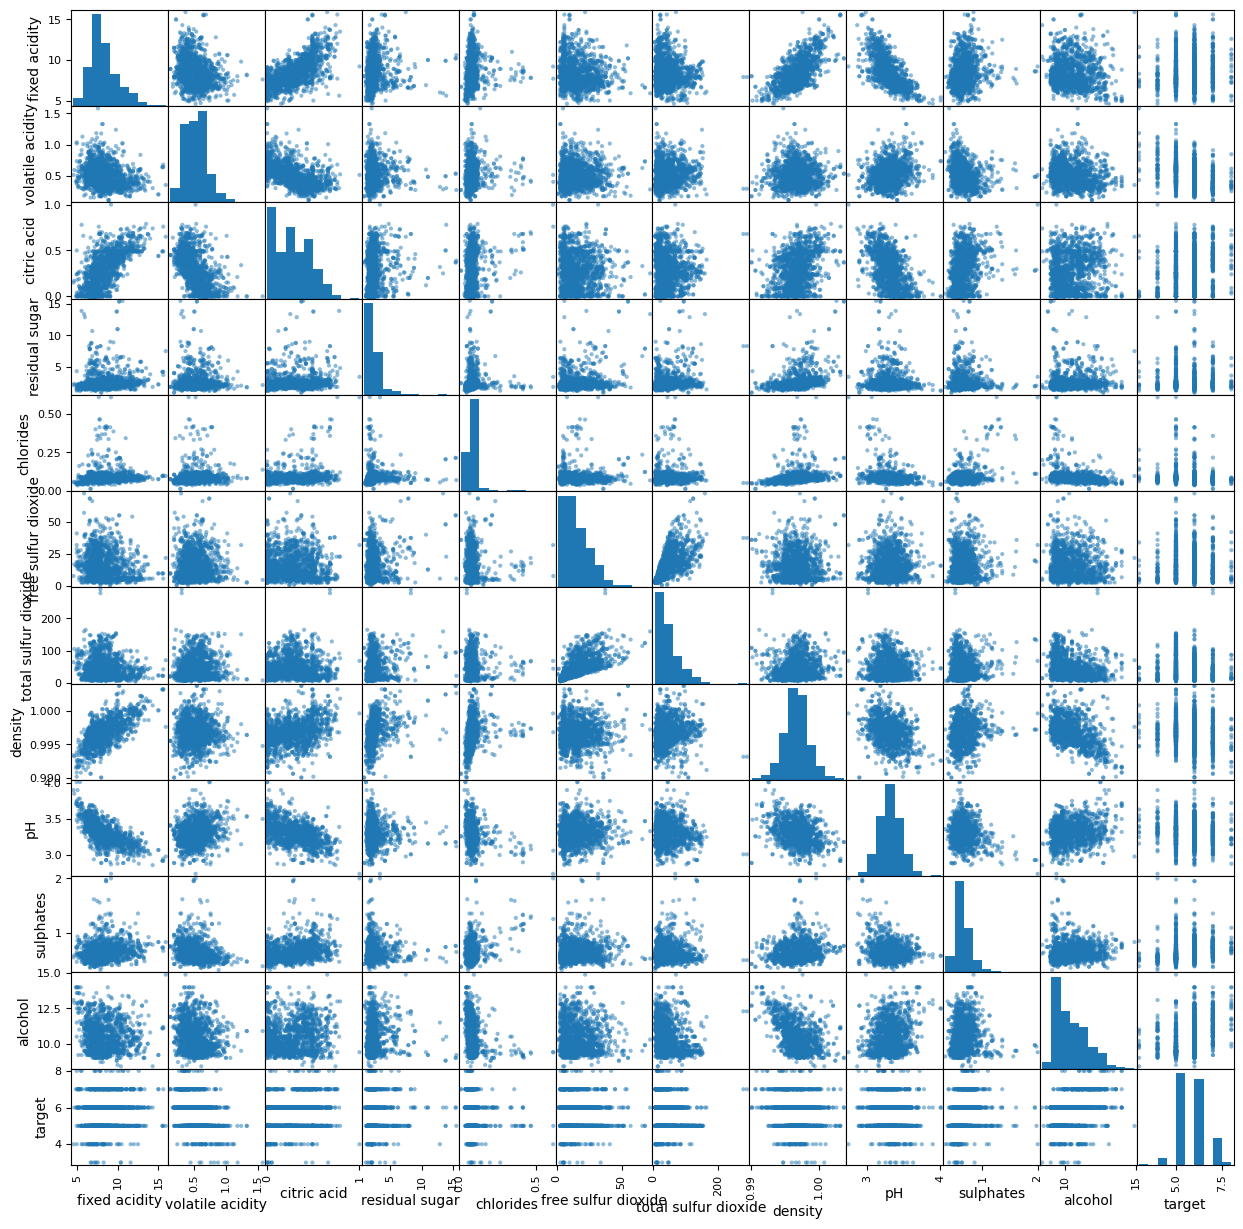

In [34]:
pd.plotting.scatter_matrix(df, alpha=.5, figsize=(15, 15));

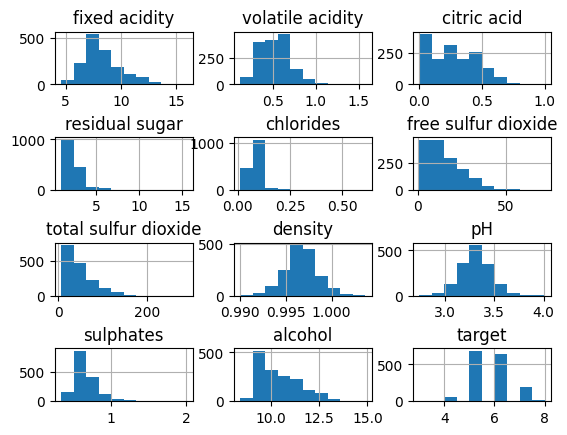

In [35]:
df.hist();
plt.subplots_adjust(hspace=1)

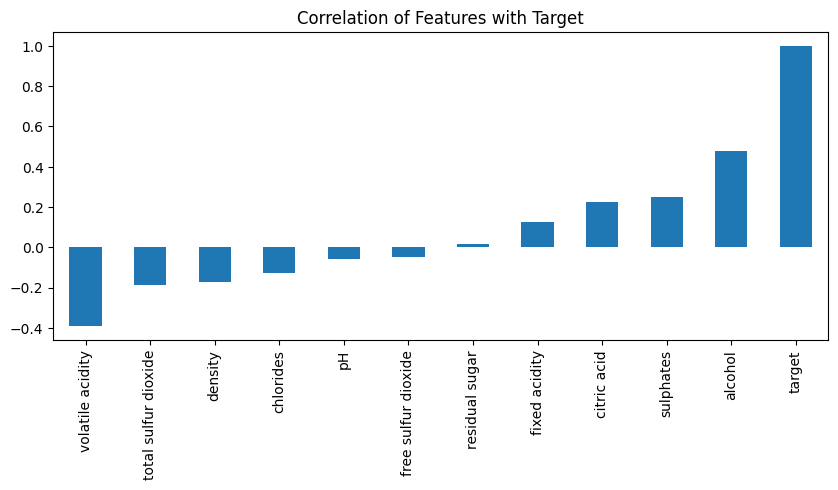

In [36]:
df.corr()['target'].sort_values().plot(kind='bar', figsize=(10,4))
plt.title("Correlation of Features with Target");

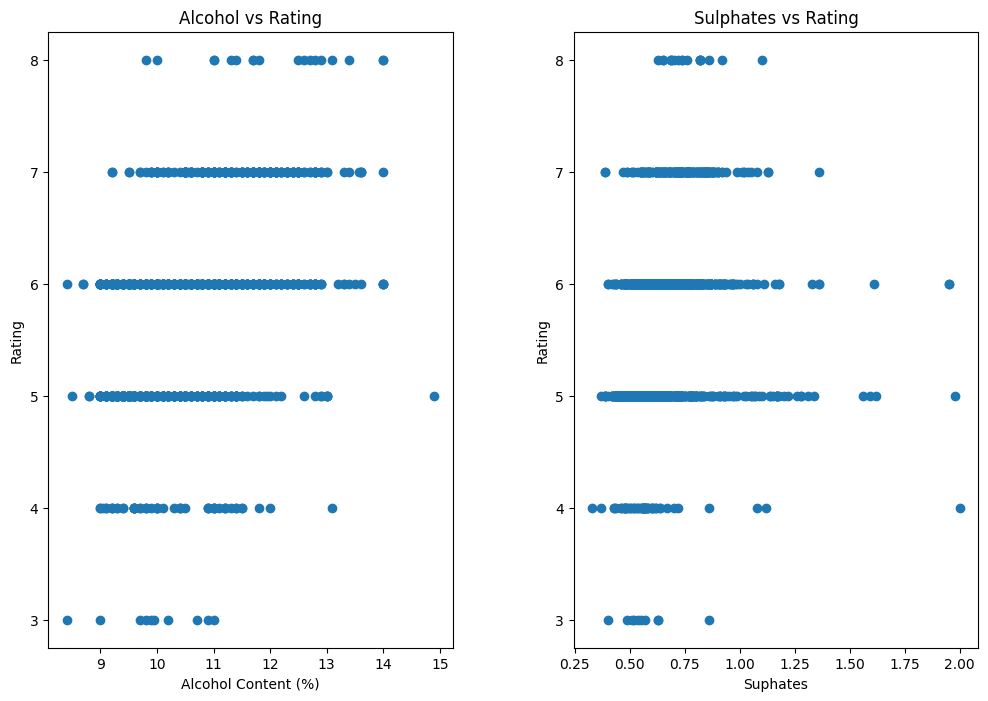

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.subplots_adjust(wspace=.3, hspace=.3)

axes[0].scatter(df["alcohol"], df["target"])
axes[0].set_title("Alcohol vs Rating")
axes[0].set_xlabel("Alcohol Content (%)")
axes[0].set_ylabel("Rating")

axes[1].scatter(df["sulphates"], df["target"])
axes[1].set_title("Sulphates vs Rating")
axes[1].set_xlabel("Suphates")
axes[1].set_ylabel("Rating");

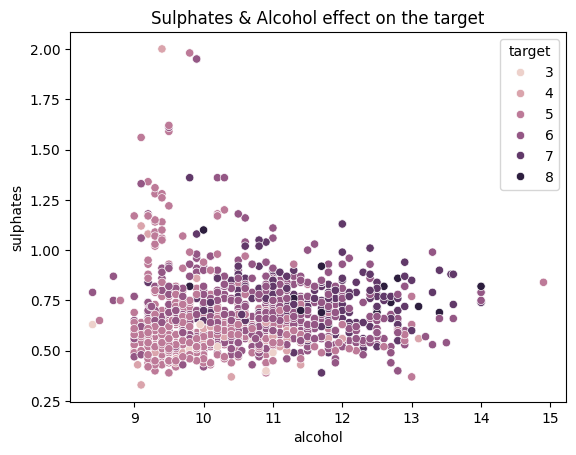

In [38]:
sns.scatterplot(data=df, x="alcohol", y="sulphates", hue="target")
plt.title("Sulphates & Alcohol effect on the target");

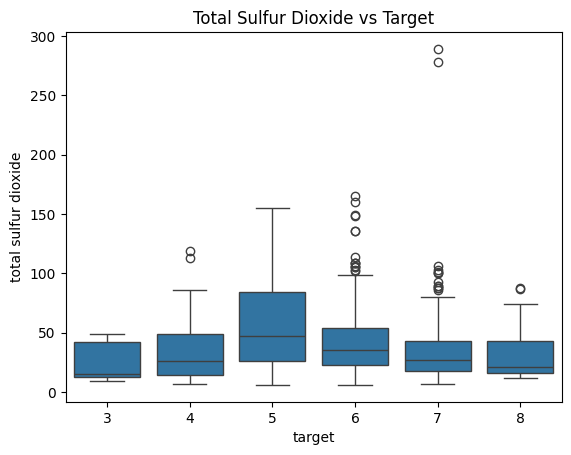

In [39]:
sns.boxplot(x="target", y="total sulfur dioxide", data=df)
plt.title("Total Sulfur Dioxide vs Target");

### Section 2 - Three Interesting Findings

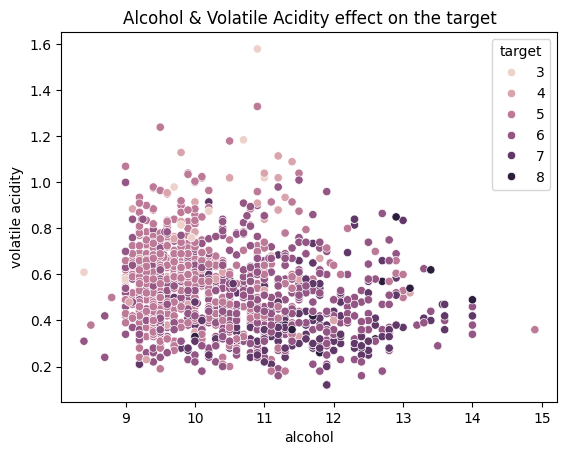

In [40]:
sns.scatterplot(data=df, x="alcohol", y="volatile acidity", hue="target")
plt.title("Alcohol & Volatile Acidity effect on the target");

The above chart is interesting because it shows how well alcohol content and volatile acidty can be together as a prediction of the target. A low acidity with a high alcohol content is more likley to have a high rating, while a high acidity and low alcohol content is likely to be low. 

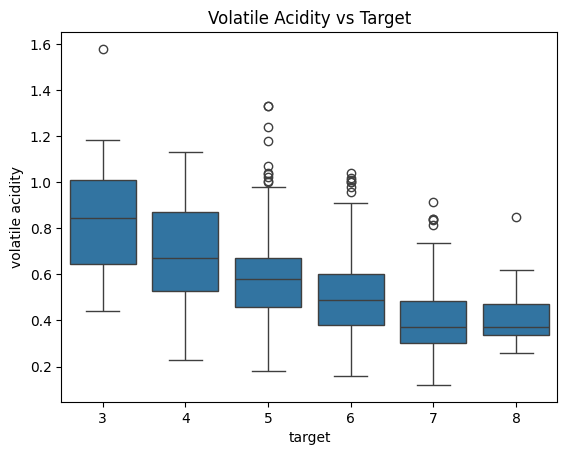

In [41]:
sns.boxplot(x="target", y="volatile acidity", data=df)
plt.title("Volatile Acidity vs Target");

This boxplot was interesting to me becasue it tells the story of how volatile acidity alone is a good predictor of the target. Besides some outliers, shown as circles, a hgiher volatile acidity is likley to have a lower target rating. The opposite is trues as well, where a lower volatile acidity is likley to have a higher rating.

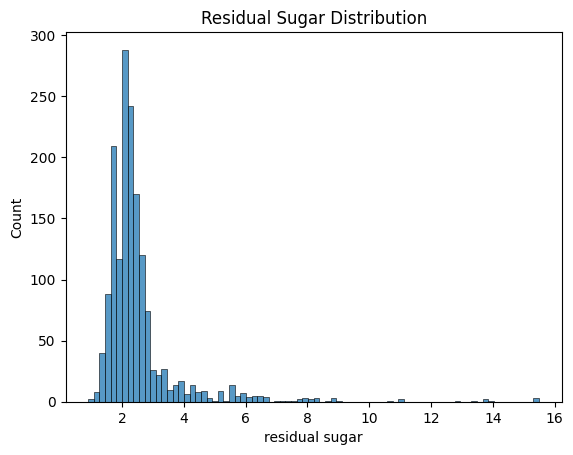

In [42]:
sns.histplot(df["residual sugar"])
plt.title("Residual Sugar Distribution");

This chart was interesting to me because it had ther lowest correlation. Looking at the distribution makes me wonder if it would be better correlated if the sample just had a more even distribution of residual sugar instead of being heavily skewed.

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

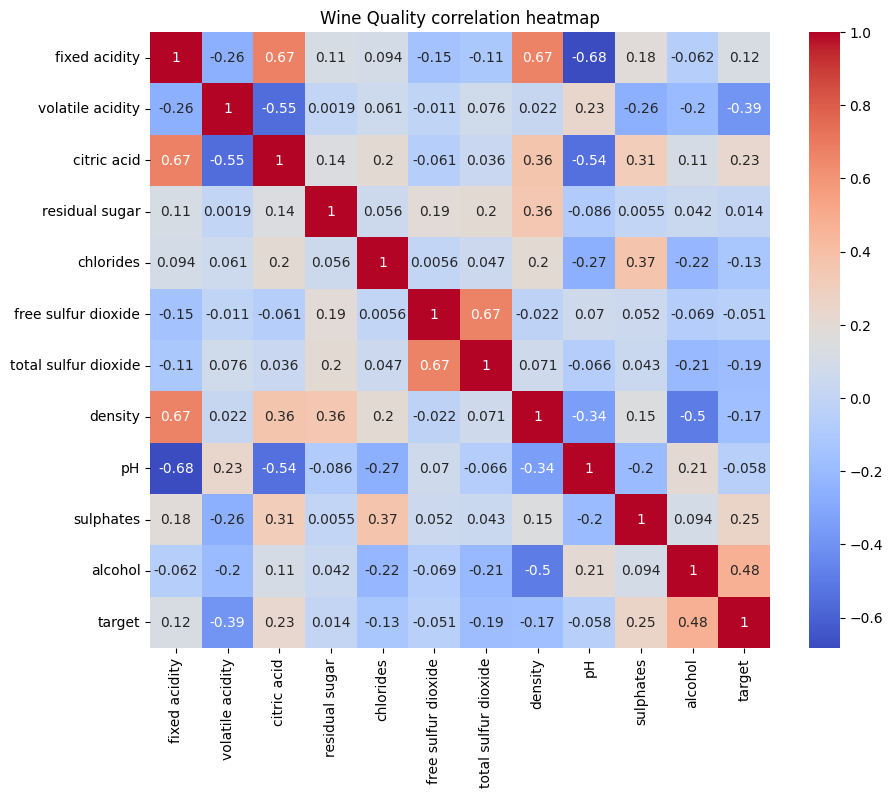

In [43]:
# YOUR CODE HERE
import seaborn
plt.figure(figsize=(10,8))
ax = seaborn.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Wine Quality correlation heatmap");

YOUR ANSWERS HERE

There was a 3-way tie for the most correlated pairs of columns, with each having a correllation coefficient of 0.67: <br>

- density, fixed acidity <br>
- citric acid, fixed acidity <br>
- total sulphur dioxide, free sulfur dioxide


### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

YOUR ANSWERS HERE<br>
<br>
1: sklearn.linear_model.LinearRegression <br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html <br>
https://en.wikipedia.org/wiki/Linear_regression <br>
<br>
2: sklearn.ensemble.GradientBoostingRegressor <br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html <br>
https://en.wikipedia.org/wiki/Gradient_boosting <br>
<br>
3: sklearn.svm.SVR <br>
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html <br>
https://en.wikipedia.org/wiki/Support_vector_machine#Regression <br>

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [44]:
# YOUR CODE HERE

X = df.drop('target', axis=1)
y = df['target']

lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(X,y)
lr_ypred = lr_model.predict(X)
print(f"Linear Regression Loss Results: \n L1: {np.mean(np.abs(y - lr_ypred)):.4f} \n L2: {np.mean(np.square(y - lr_ypred)):.4f}\n ")

gbr_model = sklearn.ensemble.GradientBoostingRegressor()
gbr_model.fit(X,y)
gbr_ypred = gbr_model.predict(X)
print(f"Gradient Boosting Regressor Loss Results: \n L1: {np.mean(np.abs(y - gbr_ypred)):.4f} \n L2: {np.mean(np.square(y - gbr_ypred)):.4f}\n")

svr_model = sklearn.svm.SVR()
svr_model.fit(X,y)
svr_ypred = svr_model.predict(X)
print(f"SVR Loss Results: \n L1: {np.mean(np.abs(y - svr_ypred)):.4f} \n L2: {np.mean(np.square(y - svr_ypred)):.4f} ");

Linear Regression Loss Results: 
 L1: 0.5005 
 L2: 0.4168
 
Gradient Boosting Regressor Loss Results: 
 L1: 0.3967 
 L2: 0.2544

SVR Loss Results: 
 L1: 0.5463 
 L2: 0.5231 


YOUR ANSWERS HERE

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [45]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

lr_cv = np.mean(-1 * cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Linear Regression L2: {lr_cv:.4f}")

gbr_cv = np.mean(-1 * cross_val_score(gbr_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Gradient Boosting Regressor L2: {gbr_cv:.4f}")

svr_cv = np.mean(-1 * cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"SVR L2: {svr_cv:.4f}")

Linear Regression L2: 0.4366


Gradient Boosting Regressor L2: 0.4187
SVR L2: 0.5665


YOUR ANSWERS HERE

Yes, the L2 losses came out higher when using the more accruate cross validation technique to check the loss, especially for the GBR model. This makes sense since in problem 6, we used the full dataset, so the same data used to make the model was predicted on as well.

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [46]:
# YOUR CODE HERE

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_standardized = (X - X_mean) / X_std
X_standardized.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946


In [47]:
lr_model = sklearn.linear_model.LinearRegression()
lr_model.fit(X_standardized,y)
lr_ypred = lr_model.predict(X_standardized)
print(f"Linear Regression Loss Results: \n L1: {np.mean(np.abs(y - lr_ypred)):.4f} \n L2: {np.mean(np.square(y - lr_ypred)):.4f}\n ")

gbr_model = sklearn.ensemble.GradientBoostingRegressor()
gbr_model.fit(X_standardized,y)
gbr_ypred = gbr_model.predict(X_standardized)
print(f"Gradient Boosting Regressor Loss Results: \n L1: {np.mean(np.abs(y - gbr_ypred)):.4f} \n L2: {np.mean(np.square(y - gbr_ypred)):.4f}\n")

svr_model = sklearn.svm.SVR()
svr_model.fit(X_standardized,y)
svr_ypred = svr_model.predict(X_standardized)
print(f"SVR Loss Results: \n L1: {np.mean(np.abs(y - svr_ypred)):.4f} \n L2: {np.mean(np.square(y - svr_ypred)):.4f} ");

Linear Regression Loss Results: 
 L1: 0.5005 
 L2: 0.4168
 
Gradient Boosting Regressor Loss Results: 
 L1: 0.3967 
 L2: 0.2544

SVR Loss Results: 
 L1: 0.3837 
 L2: 0.2974 


YOUR ANSWERS HERE <br>
In terms of L2 loss, the linear regression model and the gradient boosting model both performed the same as in problem 6, however the SVR model performed much better with the standardized data.

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

YOUR ANSWERS HERE<br>
The model may perform better, but even with cross validation, the model still may become overfit as it will fit closly with noise that is in the dataset.

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

In [48]:
# YOUR CODE HERE
#Without standardizing
lr_cv = np.mean(-1 * cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Linear Regression L2: {lr_cv:.4f}")

gbr_cv = np.mean(-1 * cross_val_score(gbr_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Gradient Boosting Regressor L2: {gbr_cv:.4f}")

svr_cv = np.mean(-1 * cross_val_score(svr_model, X, y, cv=5, scoring='neg_mean_squared_error'))
print(f"SVR L2: {svr_cv:.4f}")

#with standardizing
lr_cv = np.mean(-1 * cross_val_score(lr_model, X_standardized, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Standardized Linear Regression L2: {lr_cv:.4f}")

gbr_cv = np.mean(-1 * cross_val_score(gbr_model, X_standardized, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Standardized Gradient Boosting Regressor L2: {gbr_cv:.4f}")

svr_cv = np.mean(-1 * cross_val_score(svr_model, X_standardized, y, cv=5, scoring='neg_mean_squared_error'))
print(f"Standardized SVR L2: {svr_cv:.4f}")



Linear Regression L2: 0.4366


Gradient Boosting Regressor L2: 0.4194
SVR L2: 0.5665
Standardized Linear Regression L2: 0.4366
Standardized Gradient Boosting Regressor L2: 0.4184
Standardized SVR L2: 0.4236


YOUR ANSWERS HERE

I would choose the gradient boosting model with standardized data. The reason I chose this was based off of the L2 loss tested for each model, both with and without standardized data. I used cross validation score for all of my models in this test to avoid overfitting when using the full dataset like in problem 6.